In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Electric_Production.csv')

In [3]:
df.head(10)

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151
5,6/1/1985,58.0904
6,7/1/1985,62.6202
7,8/1/1985,63.2485
8,9/1/1985,60.5846
9,10/1/1985,56.3154


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DATE        397 non-null    object 
 1   IPG2211A2N  397 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.3+ KB


In [5]:
df.shape

(397, 2)

In [6]:
df.dtypes.value_counts()

object     1
float64    1
dtype: int64

In [7]:
df['DATE'] = pd.to_datetime(df['DATE'])

In [8]:
df.head(10)

,DATE,IPG2211A2N
0,1985-01-01,72.5052
1,1985-02-01,70.6720
2,1985-03-01,62.4502
3,1985-04-01,57.4714
4,1985-05-01,55.3151
5,1985-06-01,58.0904
6,1985-07-01,62.6202
7,1985-08-01,63.2485
8,1985-09-01,60.5846
9,1985-10-01,56.3154


In [9]:
df.set_index(df['DATE'], inplace = True)
df = df.drop('DATE',axis=1)

In [10]:
df.head(10)

,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151
1985-06-01,58.0904
1985-07-01,62.6202
1985-08-01,63.2485
1985-09-01,60.5846


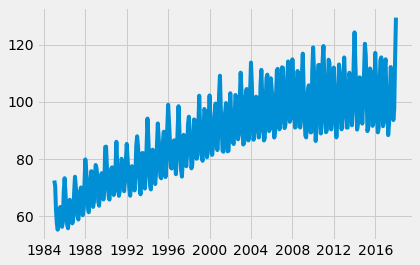

In [11]:
plt.plot(df)

Stationary Test using Dickey-Fuller Method

In [12]:
from statsmodels.tsa.stattools import adfuller
adf = adfuller(df.IPG2211A2N)
print('p-value: ',adf[1])

p-value:  0.18621469116586903


The p-value is greater than 0.05. hence, the data set is non-stationary

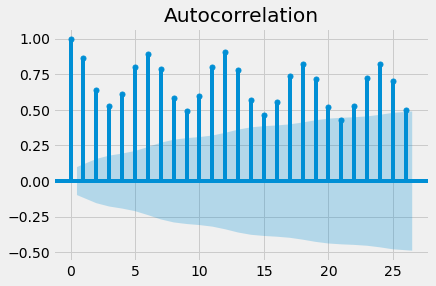

In [13]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(df.IPG2211A2N);

Applying first and second differences because of non-stationarity

1st Order differencing

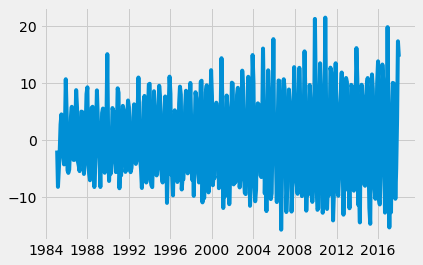

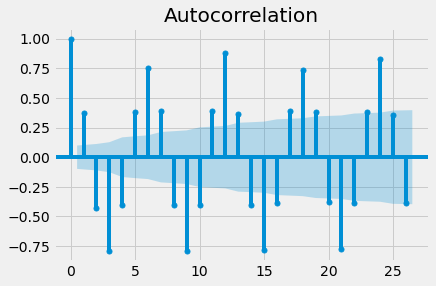

In [14]:
plt.plot(df.IPG2211A2N.diff().dropna())
plot_acf(df.IPG2211A2N.diff().dropna());

2nd oder differencing

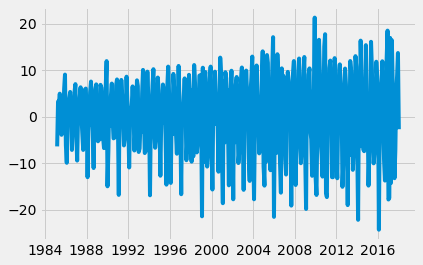

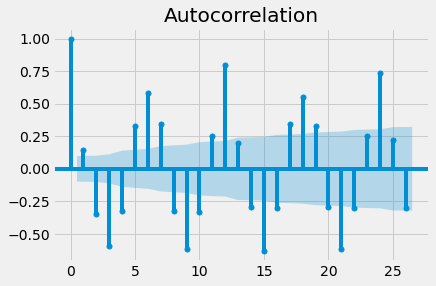

In [15]:
plt.plot(df.IPG2211A2N.diff().diff().dropna())
plot_acf(df.IPG2211A2N.diff().diff().dropna());

Autoregression - p parameter

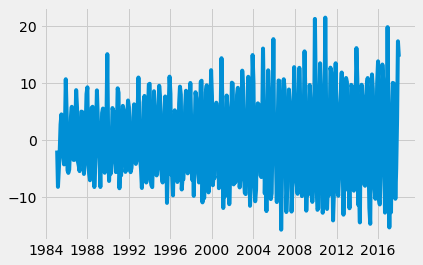

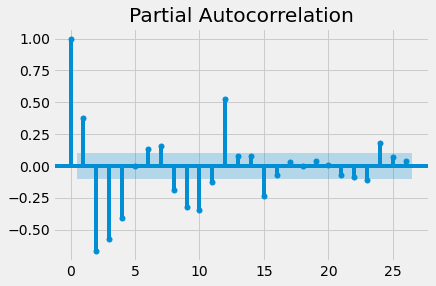

In [16]:
plt.plot(df.IPG2211A2N.diff().dropna())
plot_pacf(df.IPG2211A2N.diff().dropna());

Moving average - q parameter

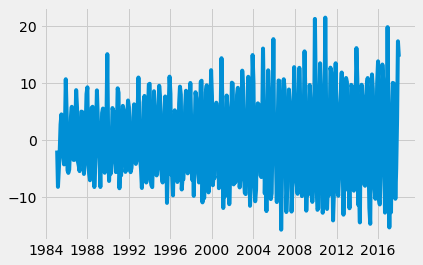

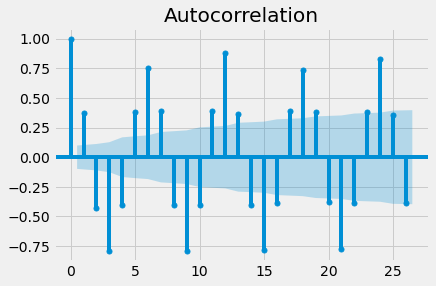

In [17]:
plt.plot(df.IPG2211A2N.diff().dropna())
plot_acf(df.IPG2211A2N.diff().dropna());

ARIMA model with order(1,1,1)

In [18]:
from  statsmodels.tsa.arima_model import ARIMA
arima = ARIMA(df.IPG2211A2N,order=(1,1,1))
model = arima.fit()
print(model.summary())

                             ARIMA Model Results                              
Dep. Variable:           D.IPG2211A2N   No. Observations:                  396
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1327.994
Method:                       css-mle   S.D. of innovations              6.904
Date:                Tue, 01 Sep 2020   AIC                           2663.989
Time:                        02:58:24   BIC                           2679.914
Sample:                    02-01-1985   HQIC                          2670.298
                         - 01-01-2018                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1108      0.020      5.607      0.000       0.072       0.149
ar.L1.D.IPG2211A2N     0.5414      0.045     11.919      0.000       0.452       0.630
ma.L1.D.IPG2211A2N  

Model Accuracy

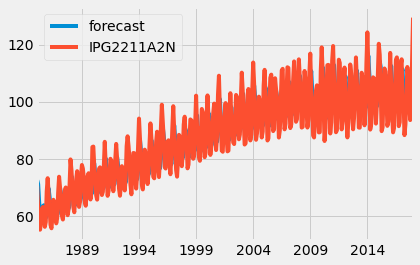

In [19]:
model.plot_predict();

Building Model

In [20]:
#splitting the data into train and test sets
train = df[:360]
test = df[360:]

In [21]:
arima = ARIMA(train,order = (1,1,1))
model = arima.fit()
print(model.summary())

                             ARIMA Model Results                              
Dep. Variable:           D.IPG2211A2N   No. Observations:                  359
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1189.066
Method:                       css-mle   S.D. of innovations              6.621
Date:                Tue, 01 Sep 2020   AIC                           2386.132
Time:                        02:58:25   BIC                           2401.665
Sample:                    02-01-1985   HQIC                          2392.309
                         - 12-01-2014                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1195      0.017      6.839      0.000       0.085       0.154
ar.L1.D.IPG2211A2N     0.5379      0.047     11.363      0.000       0.445       0.631
ma.L1.D.IPG2211A2N  

In [22]:
fcast,se,confidencebands = model.forecast(37,alpha=0.01)

In [23]:
pred = pd.DataFrame(data=fcast,columns=['values'])
pred.set_index(test.index,inplace = True)
pred.tail(10)

,values
DATE,
2017-04-01,110.081846
2017-05-01,110.201313
2017-06-01,110.320781
2017-07-01,110.440248
2017-08-01,110.559716
2017-09-01,110.679183
2017-10-01,110.798651
2017-11-01,110.918118
2017-12-01,111.037585


Text(0, 0.5, 'Electricity Production')

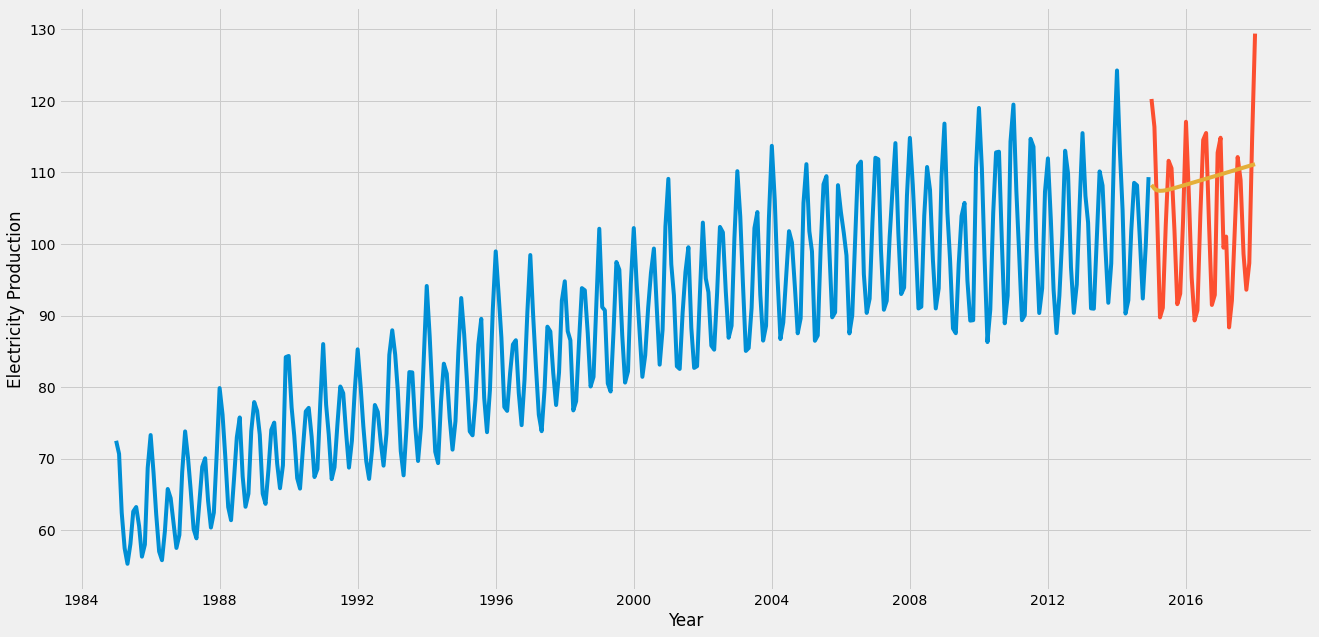

In [24]:
plt.figure(figsize = (20,10))
plt.plot(train,label = 'Trained')
plt.plot(test,label = 'Original')
plt.plot(pred, label = 'Predicted')
plt.legend
plt.xlabel('Year')
plt.ylabel('Electricity Production')

The forecast is similar to the actual results

<Figure size 1440x720 with 0 Axes>

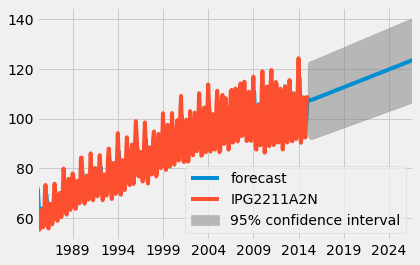

In [25]:
plt.figure(figsize = (20,10))
model.plot_predict(1,500);

From the figure above there will be increase in the amount of electricity production in future years